# Module 4: Recurrent Neural Networks and Sequence Modeling

This comprehensive notebook covers RNNs, LSTMs, and sequence modeling techniques with hands-on PyTorch examples. Following our established format, it provides self-contained explanations with practical demonstrations using JSON-based datasets.


## Setup & Environment

Run once to install required packages and set up consistent styling.


In [1]:
import sys, subprocess, importlib
def pip_install(pkg):
    try: importlib.import_module(pkg)
    except ImportError:
        print(f'Installing {pkg}...'); subprocess.check_call([sys.executable,'-m','pip','install',pkg])
for p in ['numpy','pandas','matplotlib','scikit-learn','torch','seaborn']:
    pip_install(p)
print('Packages ready.')

Installing scikit-learn...
Packages ready.


In [2]:
# ArivuAI styling (consistent with previous modules)
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(8.0,5.0)
mpl.rcParams['axes.titlesize']=14
mpl.rcParams['axes.labelsize']=12
mpl.rcParams['axes.edgecolor']='#4F4F4F'
mpl.rcParams['axes.titleweight']='bold'
mpl.rcParams['font.size']=11
mpl.rcParams['axes.prop_cycle']=mpl.cycler(color=['#004E89','#3DA5D9','#F1A208','#4F4F4F','#E74C3C'])
print('Styling applied.')

Styling applied.


## Background & Why This Matters (Expanded)

Sequential data is everywhere: text, speech, time series, DNA sequences, stock prices, sensor readings. Traditional feedforward networks process inputs independently, but sequences have temporal dependencies where order matters.

**Key Challenges with Sequential Data:**

- **Variable Length:** Sequences can be short or very long
- **Temporal Dependencies:** Current output depends on previous inputs
- **Long-term Memory:** Important information might be far in the past
- **Vanishing Gradients:** Standard RNNs struggle with long sequences
- **Context Understanding:** Meaning depends on surrounding context

**What We'll Learn:**

- Vanilla RNNs: Basic recurrent architecture and limitations
- LSTM/GRU: Advanced architectures that solve vanishing gradient problem
- Sequence-to-sequence modeling: Many-to-one, one-to-many, many-to-many
- Text generation and time series prediction
- Attention mechanisms and their importance
- Practical implementation patterns in PyTorch

**Real-world Applications:**

- Language translation and text generation
- Speech recognition and synthesis
- Stock price and weather prediction
- Sentiment analysis and document classification
- Music and video generation

By the end, you'll understand how to build and train RNNs for various sequence modeling tasks.


## Prerequisites & Required Knowledge

**Essential Background:**

- Module 1-3: Deep learning fundamentals, training techniques
- Understanding of backpropagation through time (BPTT, i.e., Backpropagation Through Time)
- Basic knowledge of sequence data types
- Familiarity with gradient flow and vanishing gradient problem

**PyTorch RNN Concepts We'll Use:**

- `nn.RNN` (Recurrent Neural Network), `nn.LSTM` (Long Short-Term Memory), `nn.GRU` (Gated Recurrent Unit): Built-in recurrent layers.
- `pack_padded_sequence`: Efficient handling of variable-length sequences
- Hidden state management: Initializing and passing hidden states
- Sequence batching: Processing multiple sequences simultaneously
- Embedding layers: Converting discrete tokens to dense vectors

**Mathematical Foundations:**

- **Recurrent Computation:** h*t = f(h*{t-1}, x_t)
- **Backpropagation Through Time:** Unrolling RNN for gradient computation
- **LSTM Gates:** Forget, input, and output gates for memory control
- **Sequence Loss:** Computing loss over entire sequences
- **Teacher Forcing:** Training technique for sequence generation


## Learning Objectives & Outline

**By the end of this module, you will be able to:**

1. Understand RNN architecture and information flow
2. Implement vanilla RNNs and identify their limitations
3. Build LSTM/GRU networks for long sequence modeling
4. Handle variable-length sequences efficiently
5. Create sequence classification and regression models
6. Implement basic text generation with character-level RNNs
7. Debug common RNN training issues (exploding/vanishing gradients)
8. Apply sequence modeling to time series prediction

**Hands-on Exercises:**

- Vanilla RNN for sequence classification
- LSTM vs RNN comparison on long sequences
- Time series prediction with RNNs
- Character-level text generation
- Sequence length and batch processing
- Gradient flow visualization in RNNs


## 1) Understanding RNN Architecture

### What is a Recurrent Neural Network (RNN)?

A **Recurrent Neural Network (RNN)** is a type of neural network designed for processing sequential data, where the order and context of elements matter. Unlike traditional feedforward networks, RNNs have loops that allow information to persist, enabling them to maintain a "memory" of previous inputs.

**Key characteristics:**
- **Sequential Processing:** RNNs process input sequences one element at a time, maintaining a hidden state that captures information about previous elements.
- **Shared Parameters:** The same weights are used at every time step, making RNNs efficient for variable-length sequences.
- **Temporal Dependencies:** RNNs can model dependencies across time, making them suitable for tasks like language modeling, time series prediction, and speech recognition.

**Typical RNN computation:**
At each time step *t*, the RNN updates its hidden state *hₜ* based on the current input *xₜ* and the previous hidden state *hₜ₋₁*:
```
hₜ = f(hₜ₋₁, xₜ)
```
where *f* is a nonlinear function (e.g., `tanh` or `ReLU`).

**Applications:**
- Natural language processing (NLP)
- Time series forecasting
- Speech recognition
- Music and video generation

RNNs are foundational for more advanced sequence models like LSTMs and GRUs, which address some of their limitations (such as the vanishing gradient problem).

![RNN Architecture](images/RNN.webp)  
*Figure: Basic structure of a Recurrent Neural Network (RNN). The hidden state loops information from previous time steps, enabling sequence modeling.*

### Example: Predicting the Next Value in a Sequence with an RNN

Suppose we have a sequence of numbers and want to predict the next value at each time step. For example, given `[0.1, 0.2, 0.3]`, predict the next value in the sequence.

A simple RNN processes the sequence step by step, maintaining a hidden state that "remembers" information from previous steps. At each time step, the RNN updates its hidden state and produces an output.

**Illustration:**


- **x₁, x₂, x₃:** Input values at each time step
- **h₁, h₂, h₃:** Hidden states (carry information forward)
- **y₁, y₂, y₃:** Outputs (predicted next values)

**Applications:**
- Time series forecasting (e.g., stock prices, weather)
- Text generation (predict next character/word)
- Speech recognition (process audio frames sequentially)

This structure allows RNNs to model temporal dependencies and patterns in sequential data.

The term **"recurrent"** in Recurrent Neural Networks (RNNs) refers to the network's ability to loop information from previous time steps back into the model as it processes a sequence. This recurrence allows the network to maintain a **hidden state** that "remembers" information about earlier elements in the sequence, enabling it to model temporal dependencies and context.

- **Recurrent = Looping Back:** The output from one time step is fed back as input to the next, creating a feedback loop.
- **Memory:** This structure gives RNNs a form of memory, allowing them to use past information to influence future predictions.
- **Contrast with Feedforward Networks:** Unlike standard neural networks, which process inputs independently, RNNs are specifically designed for sequential data where order and context matter.

In summary, "recurrent" highlights the network's looping structure, which is essential for handling sequences and time-dependent data.

RNN Architecture Demonstration:
Input shape: torch.Size([1, 3, 2]) (batch_size, seq_len, input_size)
Output shape: torch.Size([1, 3, 4]) (batch_size, seq_len, hidden_size)
Final hidden state shape: torch.Size([1, 1, 4]) (num_layers, batch_size, hidden_size)

Step-by-step outputs:
Time step 1: input=[1.0, 0.5], output=[ 0.23764601 -0.5454127   0.24610558 -0.6761446 ]
Time step 2: input=[0.800000011920929, 0.30000001192092896], output=[ 0.40642336 -0.47950396  0.15929656 -0.8106875 ]
Time step 3: input=[0.20000000298023224, 0.8999999761581421], output=[ 0.42260453 -0.12050725  0.34519088 -0.7046779 ]


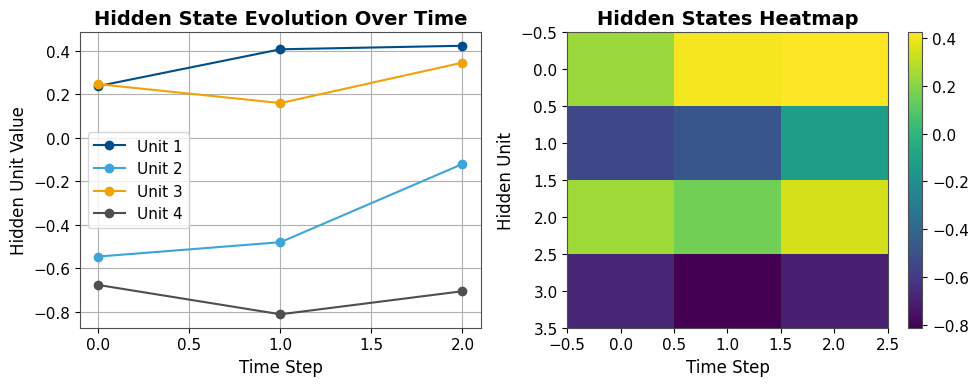

In [3]:
import torch, torch.nn as nn, torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Simple RNN visualization
def visualize_rnn_computation():
    """Demonstrate RNN computation step by step"""
    # Simple example: 3-step sequence, 2 input features, 4 hidden units
    torch.manual_seed(42)
    rnn = nn.RNN(input_size=2, hidden_size=4, batch_first=True)
    
    # Sample input: batch_size=1, seq_len=3, input_size=2
    x = torch.tensor([[[1.0, 0.5], [0.8, 0.3], [0.2, 0.9]]], dtype=torch.float32)
    
    # Forward pass
    output, hidden = rnn(x)
    
    print('RNN Architecture Demonstration:')
    print(f'Input shape: {x.shape} (batch_size, seq_len, input_size)')
    print(f'Output shape: {output.shape} (batch_size, seq_len, hidden_size)')
    print(f'Final hidden state shape: {hidden.shape} (num_layers, batch_size, hidden_size)')
    
    # Show step-by-step computation
    print('\nStep-by-step outputs:')
    for t in range(x.shape[1]):
        print(f'Time step {t+1}: input={x[0,t].tolist()}, output={output[0,t].detach().numpy()}')
    
    return output, hidden

output, hidden = visualize_rnn_computation()

# Visualize hidden state evolution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(output[0].detach().numpy(), marker='o')
plt.title('Hidden State Evolution Over Time')
plt.xlabel('Time Step')
plt.ylabel('Hidden Unit Value')
plt.legend([f'Unit {i+1}' for i in range(4)])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.imshow(output[0].detach().numpy().T, aspect='auto', cmap='viridis')
plt.title('Hidden States Heatmap')
plt.xlabel('Time Step')
plt.ylabel('Hidden Unit')
plt.colorbar()

plt.tight_layout()
plt.show()

**Key Points:**

- **Sequential Processing:** RNN processes one time step at a time
- **Hidden State:** Carries information from previous time steps
- **Parameter Sharing:** Same weights used at each time step
- **Output Options:** Can use output at each step or just the final output


## Data Loading & Path Detection

Robust data loading that works regardless of where you start the notebook.


In [5]:
from pathlib import Path
import json, numpy as np, pandas as pd
print('CWD =', Path.cwd())
candidates = [Path.cwd()/'Module 3'/'data', Path.cwd()/'data']
DATA_DIR = next((p for p in candidates if p.is_dir()), None)
if DATA_DIR is None:
    for parent in [Path.cwd()]+list(Path.cwd().parents):
        p = parent/'Module 3'/'data'
        if p.is_dir(): DATA_DIR=p; break
if DATA_DIR is None: raise FileNotFoundError('Could not locate Module 3/data')
print('Using DATA_DIR =', DATA_DIR)
print('Available datasets:', [x.name for x in DATA_DIR.iterdir() if x.suffix == '.json'])

CWD = d:\Suni Files\AI Code Base\Oil and Gas\Oil and Gas Pruthvi College Course Material\Module 4
Using DATA_DIR = d:\Suni Files\AI Code Base\Oil and Gas\Oil and Gas Pruthvi College Course Material\Module 4\data
Available datasets: ['sequence_classification.json', 'text_generation_simple.json', 'time_series_prediction.json']


## 2) Vanilla RNN for Sequence Classification

Let's implement a simple RNN for binary sequence classification to understand the basics.


Dataset: 16 sequences of length 5
Pattern: Label 0: increasing or constant low values, Label 1: decreasing or constant high values
Sample sequence: [0.10000000149011612, 0.20000000298023224, 0.30000001192092896, 0.4000000059604645, 0.5], label: 0


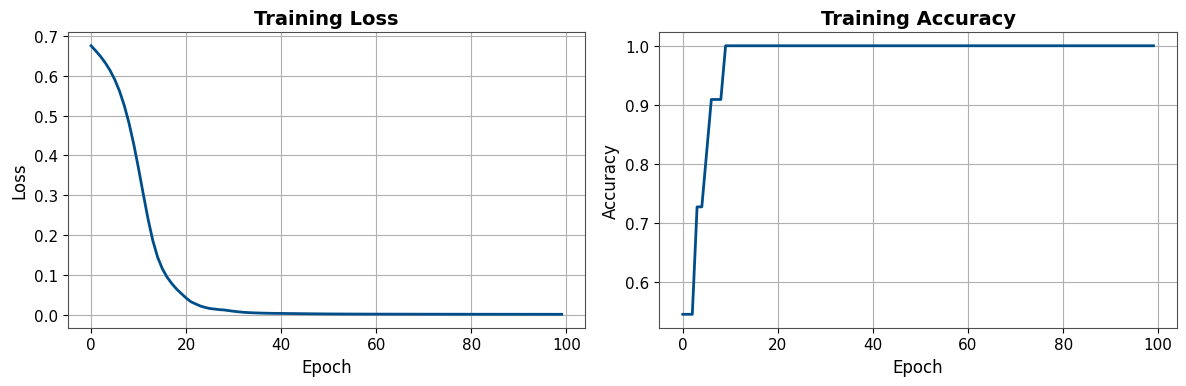

Final Training Accuracy: 1.000
Test Accuracy: 1.000

Sample Predictions:
Sequence: [0.10000000149011612, 0.30000001192092896, 0.5, 0.699999988079071, 0.8999999761581421], True: 0, Predicted: 0
Sequence: [0.0, 0.20000000298023224, 0.4000000059604645, 0.6000000238418579, 0.800000011920929], True: 0, Predicted: 0
Sequence: [0.699999988079071, 0.699999988079071, 0.699999988079071, 0.699999988079071, 0.699999988079071], True: 1, Predicted: 1


In [6]:
# Load sequence classification data
with (DATA_DIR/'sequence_classification.json').open() as f: seq_data = json.load(f)

# Convert to tensors
sequences = torch.tensor(seq_data['sequences'], dtype=torch.float32).unsqueeze(-1)  # Add feature dimension
labels = torch.tensor(seq_data['labels'], dtype=torch.long)

print(f'Dataset: {len(sequences)} sequences of length {sequences.shape[1]}')
print(f'Pattern: {seq_data["pattern_description"]}')
print(f'Sample sequence: {sequences[0].squeeze().tolist()}, label: {labels[0].item()}')

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    sequences, labels, test_size=0.3, random_state=42, stratify=labels
)

class SimpleRNNClassifier(nn.Module):
    def __init__(self, input_size=1, hidden_size=16, num_classes=2):
        super().__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.classifier = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # x shape: (batch_size, seq_len, input_size)
        rnn_out, hidden = self.rnn(x)
        # Use final time step output for classification
        final_output = rnn_out[:, -1, :]  # (batch_size, hidden_size)
        logits = self.classifier(final_output)
        return logits

# Train the model
torch.manual_seed(42)
model = SimpleRNNClassifier()
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

train_losses, train_accs = [], []

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    
    logits = model(X_train)
    loss = criterion(logits, y_train)
    loss.backward()
    optimizer.step()
    
    # Calculate accuracy
    with torch.no_grad():
        pred = logits.argmax(1)
        acc = (pred == y_train).float().mean()
    
    train_losses.append(loss.item())
    train_accs.append(acc.item())

# Test the model
model.eval()
with torch.no_grad():
    test_logits = model(X_test)
    test_pred = test_logits.argmax(1)
    test_acc = (test_pred == y_test).float().mean()

# Plot training progress
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(train_losses, linewidth=2)
ax1.set_title('Training Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)

ax2.plot(train_accs, linewidth=2)
ax2.set_title('Training Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f'Final Training Accuracy: {train_accs[-1]:.3f}')
print(f'Test Accuracy: {test_acc:.3f}')

# Show some predictions
print('\nSample Predictions:')
for i in range(3):
    seq = X_test[i].squeeze().tolist()
    true_label = y_test[i].item()
    pred_label = test_pred[i].item()
    print(f'Sequence: {seq}, True: {true_label}, Predicted: {pred_label}')

**Figure Interpretation:**

- **Left plot:** Training loss decreases as model learns sequence patterns
- **Right plot:** Accuracy improves as model distinguishes increasing vs decreasing patterns

**Takeaway:** Vanilla RNNs can learn simple sequence patterns but may struggle with longer sequences due to vanishing gradients.


## 3) LSTM vs Vanilla RNN Comparison

LSTMs solve the vanishing gradient problem through gating mechanisms. Let's compare LSTM and vanilla RNN on the same task to see the difference.


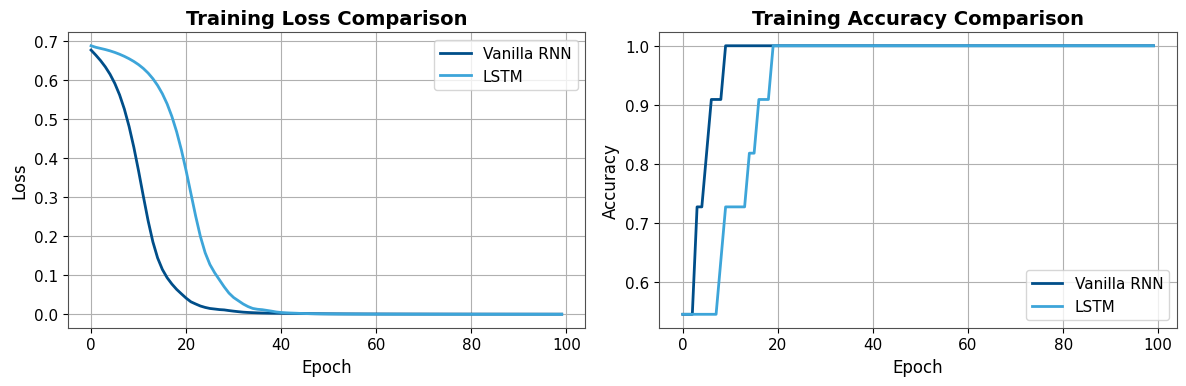

RNN Test Accuracy: 1.000
LSTM Test Accuracy: 1.000
LSTM Improvement: 0.0 percentage points


In [7]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_size=1, hidden_size=16, num_classes=2):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.classifier = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # x shape: (batch_size, seq_len, input_size)
        lstm_out, (hidden, cell) = self.lstm(x)
        # Use final time step output for classification
        final_output = lstm_out[:, -1, :]  # (batch_size, hidden_size)
        logits = self.classifier(final_output)
        return logits

def train_model(model, X_train, y_train, epochs=100, lr=0.01):
    """Train model and return training history"""
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    
    losses, accs = [], []
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        
        logits = model(X_train)
        loss = criterion(logits, y_train)
        loss.backward()
        optimizer.step()
        
        with torch.no_grad():
            pred = logits.argmax(1)
            acc = (pred == y_train).float().mean()
        
        losses.append(loss.item())
        accs.append(acc.item())
    
    return losses, accs

# Train both models
torch.manual_seed(42)
rnn_model = SimpleRNNClassifier()
rnn_losses, rnn_accs = train_model(rnn_model, X_train, y_train)

torch.manual_seed(42)
lstm_model = LSTMClassifier()
lstm_losses, lstm_accs = train_model(lstm_model, X_train, y_train)

# Test both models
rnn_model.eval()
lstm_model.eval()
with torch.no_grad():
    rnn_test_acc = (rnn_model(X_test).argmax(1) == y_test).float().mean()
    lstm_test_acc = (lstm_model(X_test).argmax(1) == y_test).float().mean()

# Plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(rnn_losses, label='Vanilla RNN', linewidth=2)
ax1.plot(lstm_losses, label='LSTM', linewidth=2)
ax1.set_title('Training Loss Comparison')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

ax2.plot(rnn_accs, label='Vanilla RNN', linewidth=2)
ax2.plot(lstm_accs, label='LSTM', linewidth=2)
ax2.set_title('Training Accuracy Comparison')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f'RNN Test Accuracy: {rnn_test_acc:.3f}')
print(f'LSTM Test Accuracy: {lstm_test_acc:.3f}')
print(f'LSTM Improvement: {((lstm_test_acc - rnn_test_acc) * 100):.1f} percentage points')

**Figure Interpretation:**

- **Left plot:** LSTM typically converges faster and to lower loss
- **Right plot:** LSTM often achieves higher accuracy, especially on longer sequences

**Takeaway:** LSTMs handle sequential dependencies better than vanilla RNNs, especially for longer sequences.


## 4) Time Series Prediction with RNNs

Let's use RNNs for regression: predicting the next value in a time series.


Time series dataset: 16 sequences
Pattern: Linear trends: increasing sequences continue up, decreasing sequences continue down
Sample: [1.0, 1.100000023841858, 1.2000000476837158, 1.2999999523162842, 1.399999976158142] -> 1.5


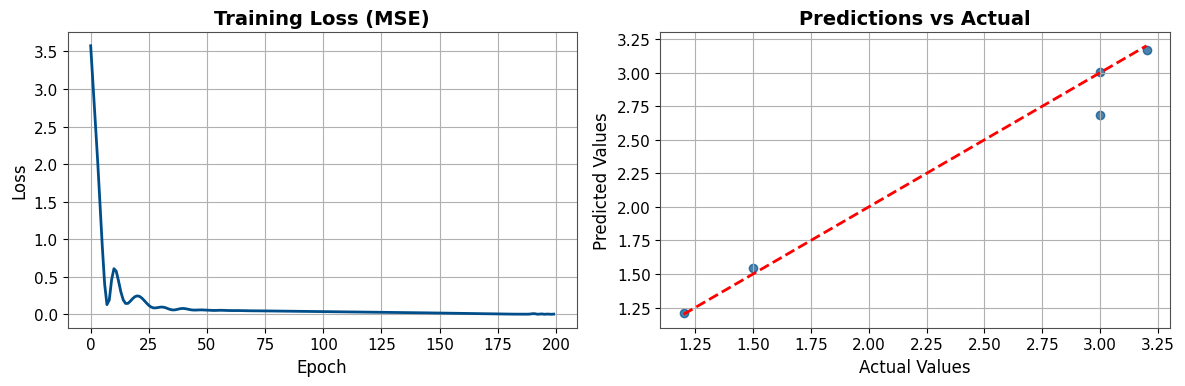

Test MSE: 0.0206
Test MAE: 0.0806

Sample Time Series Predictions:
Sequence: [1.0, 1.100000023841858, 1.2000000476837158, 1.2999999523162842, 1.399999976158142] -> Actual: 1.50, Predicted: 1.54
Sequence: [2.0, 2.200000047683716, 2.4000000953674316, 2.5999999046325684, 2.799999952316284] -> Actual: 3.00, Predicted: 2.68
Sequence: [4.0, 3.799999952316284, 3.5999999046325684, 3.4000000953674316, 3.200000047683716] -> Actual: 3.00, Predicted: 3.00


In [8]:
# Load time series data
with (DATA_DIR/'time_series_prediction.json').open() as f: ts_data = json.load(f)

# Convert to tensors
sequences = torch.tensor(ts_data['sequences'], dtype=torch.float32).unsqueeze(-1)
targets = torch.tensor(ts_data['targets'], dtype=torch.float32).unsqueeze(-1)

print(f'Time series dataset: {len(sequences)} sequences')
print(f'Pattern: {ts_data["pattern_description"]}')
print(f'Sample: {sequences[0].squeeze().tolist()} -> {targets[0].item()}')

# Split data
X_train_ts, X_test_ts, y_train_ts, y_test_ts = train_test_split(
    sequences, targets, test_size=0.3, random_state=42
)

class RNNRegressor(nn.Module):
    def __init__(self, input_size=1, hidden_size=32, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.regressor = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        # Use final time step for prediction
        prediction = self.regressor(lstm_out[:, -1, :])
        return prediction

# Train regression model
torch.manual_seed(42)
ts_model = RNNRegressor()
optimizer = optim.Adam(ts_model.parameters(), lr=0.01)
criterion = nn.MSELoss()

train_losses = []

for epoch in range(200):
    ts_model.train()
    optimizer.zero_grad()
    
    pred = ts_model(X_train_ts)
    loss = criterion(pred, y_train_ts)
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())

# Test the model
ts_model.eval()
with torch.no_grad():
    test_pred = ts_model(X_test_ts)
    test_mse = criterion(test_pred, y_test_ts)
    test_mae = torch.abs(test_pred - y_test_ts).mean()

# Visualize results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(train_losses, linewidth=2)
ax1.set_title('Training Loss (MSE)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)

# Scatter plot of predictions vs actual
ax2.scatter(y_test_ts.numpy(), test_pred.numpy(), alpha=0.7)
ax2.plot([y_test_ts.min(), y_test_ts.max()], [y_test_ts.min(), y_test_ts.max()], 'r--', linewidth=2)
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted Values')
ax2.set_title('Predictions vs Actual')
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f'Test MSE: {test_mse:.4f}')
print(f'Test MAE: {test_mae:.4f}')

# Show sample predictions
print('\nSample Time Series Predictions:')
for i in range(3):
    seq = X_test_ts[i].squeeze().tolist()
    actual = y_test_ts[i].item()
    predicted = test_pred[i].item()
    print(f'Sequence: {seq} -> Actual: {actual:.2f}, Predicted: {predicted:.2f}')

**Figure Interpretation:**

- **Left plot:** MSE loss decreases as model learns temporal patterns
- **Right plot:** Points close to diagonal line indicate good predictions

**Takeaway:** RNNs can effectively learn temporal patterns for time series prediction tasks.


## 5) Character-Level Text Generation

One of the most exciting applications of RNNs is text generation. Let's build a simple character-level language model.


Text generation dataset: 154 character sequences
Vocabulary size: 27
Sample: hello  -> w


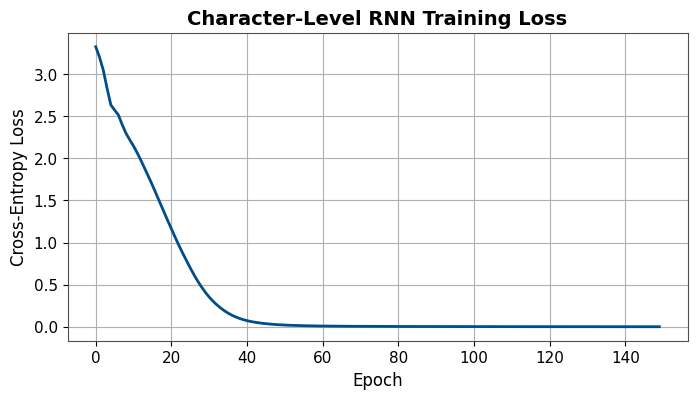


Generated Text Samples:
Seed: "deep l" -> Generated: "deep learning descent"
Seed: "neural" -> Generated: "neural networkllagage"
Seed: "machin" -> Generated: "machine learning desc"

Final training loss: 0.0019


In [9]:
# Load text generation data
with (DATA_DIR/'text_generation_simple.json').open() as f: text_data = json.load(f)

# Prepare character-level data
vocab = text_data['vocabulary']
char_to_idx = text_data['char_to_idx']
idx_to_char = {v: k for k, v in char_to_idx.items()}
vocab_size = len(vocab)

def text_to_sequences(text, seq_length=8):
    """Convert text to input-target sequence pairs"""
    sequences, targets = [], []
    for i in range(len(text) - seq_length):
        seq = text[i:i+seq_length]
        target = text[i+seq_length]
        sequences.append([char_to_idx[c] for c in seq])
        targets.append(char_to_idx[target])
    return sequences, targets

# Prepare training data from all text sequences
all_sequences, all_targets = [], []
for text in text_data['sequences']:
    seqs, targs = text_to_sequences(text, seq_length=6)
    all_sequences.extend(seqs)
    all_targets.extend(targs)

X_text = torch.tensor(all_sequences, dtype=torch.long)
y_text = torch.tensor(all_targets, dtype=torch.long)

print(f'Text generation dataset: {len(X_text)} character sequences')
print(f'Vocabulary size: {vocab_size}')
print(f'Sample: {"".join([idx_to_char[i.item()] for i in X_text[0]])} -> {idx_to_char[y_text[0].item()]}')

class CharRNN(nn.Module):
    def __init__(self, vocab_size, embed_size=32, hidden_size=64):
        super().__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)
        self.output = nn.Linear(hidden_size, vocab_size)
        
    def forward(self, x):
        # x shape: (batch_size, seq_len)
        embedded = self.embedding(x)  # (batch_size, seq_len, embed_size)
        lstm_out, _ = self.lstm(embedded)
        # Use final time step for next character prediction
        logits = self.output(lstm_out[:, -1, :])  # (batch_size, vocab_size)
        return logits
    
    def generate(self, start_seq, length=20, temperature=1.0):
        """Generate text starting from a seed sequence"""
        self.eval()
        generated = start_seq.copy()
        
        with torch.no_grad():
            for _ in range(length):
                # Use last 6 characters as input
                input_seq = torch.tensor([generated[-6:]], dtype=torch.long)
                logits = self(input_seq)
                
                # Apply temperature for sampling diversity
                probs = torch.softmax(logits / temperature, dim=-1)
                next_char = torch.multinomial(probs, 1).item()
                generated.append(next_char)
        
        return ''.join([idx_to_char[i] for i in generated])

# Train character-level RNN
torch.manual_seed(42)
char_model = CharRNN(vocab_size)
optimizer = optim.Adam(char_model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Training loop
char_losses = []
for epoch in range(150):
    char_model.train()
    optimizer.zero_grad()
    
    logits = char_model(X_text)
    loss = criterion(logits, y_text)
    loss.backward()
    optimizer.step()
    
    char_losses.append(loss.item())

# Plot training progress
plt.figure(figsize=(8, 4))
plt.plot(char_losses, linewidth=2)
plt.title('Character-Level RNN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.grid(True)
plt.show()

# Generate some text
print('\nGenerated Text Samples:')
seed_texts = ['deep l', 'neural', 'machin']
for seed in seed_texts:
    seed_indices = [char_to_idx[c] for c in seed]
    generated = char_model.generate(seed_indices, length=15, temperature=0.8)
    print(f'Seed: "{seed}" -> Generated: "{generated}"')

print(f'\nFinal training loss: {char_losses[-1]:.4f}')

**Figure Interpretation:**

- Loss decreases as the model learns character-level patterns and transitions
- Generated text shows the model has learned some basic spelling patterns

**Takeaway:** Character-level RNNs can learn basic language patterns, though more sophisticated models are needed for coherent long text generation.


## 6) Summary & Key Takeaways

In this comprehensive module, we explored RNNs and sequence modeling:

**RNN Architecture:**

- Sequential processing with hidden state memory
- Parameter sharing across time steps
- Backpropagation through time (BPTT) for training

**RNN vs LSTM:**

- Vanilla RNNs suffer from vanishing gradient problem
- LSTMs use gating mechanisms (forget, input, output gates)
- LSTMs handle long-term dependencies much better

**Sequence Modeling Tasks:**

- **Many-to-one:** Sequence classification (sentiment analysis)
- **Many-to-many:** Sequence-to-sequence (translation)
- **One-to-many:** Text generation from seed

**Practical Implementation:**

- Use `batch_first=True` for intuitive tensor shapes
- Handle variable-length sequences with padding/packing
- Apply dropout for regularization
- Use teacher forcing for training sequence generation

**Common Applications:**

- Natural language processing (translation, sentiment)
- Time series forecasting (stock prices, weather)
- Speech recognition and synthesis
- Music and video generation

**Best Practices:**

- Start with LSTM/GRU instead of vanilla RNN
- Use embedding layers for discrete inputs (text, categorical)
- Monitor gradient norms to detect exploding gradients
- Consider attention mechanisms for very long sequences

**Next Steps:**

- Explore bidirectional RNNs for better context
- Learn about attention mechanisms and Transformers
- Apply to real-world datasets (news articles, sensor data)
- Experiment with different sequence lengths and architectures


## 7) Model Checkpointing & Saving

Save trained models for later use and deployment.


In [ ]:
import pickle
from pathlib import Path

# Save the character RNN model
SAVE_DIR = DATA_DIR
torch.save(char_model.state_dict(), SAVE_DIR / 'char_rnn_model.pt')

# Save vocabulary and model info
model_info = {
    'vocab_size': vocab_size,
    'char_to_idx': char_to_idx,
    'idx_to_char': idx_to_char,
    'embed_size': 32,
    'hidden_size': 64,
    'final_loss': char_losses[-1]
}

with (SAVE_DIR / 'char_rnn_info.pkl').open('wb') as f:
    pickle.dump(model_info, f)

# Demonstrate loading
loaded_char_model = CharRNN(vocab_size)
loaded_char_model.load_state_dict(torch.load(SAVE_DIR / 'char_rnn_model.pt', map_location='cpu'))
loaded_char_model.eval()

# Test loaded model
test_seed = [char_to_idx[c] for c in 'neural']
generated_text = loaded_char_model.generate(test_seed, length=10, temperature=0.8)

print(f'Loaded model generated: "{generated_text}"')
print(f'Models saved to: {SAVE_DIR}')

## 8) Smoke Check (Run-All Test)

Validate that all RNN components work correctly.


In [ ]:
ok = True
try:
    # Test data loading
    for filename in ['sequence_classification.json', 'time_series_prediction.json', 'text_generation_simple.json']:
        with (DATA_DIR / filename).open() as f:
            json.load(f)
    print('✓ All JSON datasets loaded successfully')
    
    # Test RNN components
    test_rnn = nn.RNN(input_size=1, hidden_size=8, batch_first=True)
    test_lstm = nn.LSTM(input_size=1, hidden_size=8, batch_first=True)
    test_input = torch.randn(2, 5, 1)  # batch_size=2, seq_len=5, input_size=1
    
    rnn_out, _ = test_rnn(test_input)
    lstm_out, _ = test_lstm(test_input)
    print('✓ RNN and LSTM layers working')
    
    # Test model loading
    test_char_model = CharRNN(vocab_size)
    test_char_model.load_state_dict(torch.load(SAVE_DIR / 'char_rnn_model.pt', map_location='cpu'))
    print('✓ Model checkpoint loaded successfully')
    
    # Test text generation
    test_seed = [char_to_idx['h'], char_to_idx['e'], char_to_idx['l'], char_to_idx['l'], char_to_idx['o'], char_to_idx[' ']]
    generated = test_char_model.generate(test_seed, length=5, temperature=1.0)
    print('✓ Text generation working')
    
except Exception as e:
    ok = False
    print('✗ Smoke check failed:', e)

print('\nRESULT:', 'PASS' if ok else 'FAIL')
if ok:
    print('All Module 4 RNN components are working correctly!')
    print('You can now apply RNNs and LSTMs to your own sequence modeling tasks.')
    print('Try experimenting with different architectures, sequence lengths, and datasets.')